# Final project Submission


*   Group Number: Group 1

*   Scheduled Project review date/time: Aug 31st

*   Blog post url:




# Project Title:
## Independent Project 2: More Data, More Visualizations

# Overview
The project investigates the spatial distribution of NGOs across Uganda using the 2017 NGO census, with a focus of understanding how their presence correlates with indicators of social need- particularly education levels. By integrating geographical shapefiles and census data, the project visualizes NGO activity at the district and sub-county level to uncover patterns and gaps in service delivery

# Business Problem
Despite the proliferation of NGOs in Uganda, there is limited transparency around whether their placement aligns with actual community needs. Policy makers, donors ad civil society organizations lack a data-driven framework to assess whether NGO resources are effectively distributed. this project aims to bridge that gap by identifying undeserved regions and informing future resource allocation

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Reading and Previewing Data
## Loading the dataset

In [3]:
df = pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')
df

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,6.007239e+05
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,9.592014e+05
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9.991488e+03
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,3.897166e+04
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,2.216095e+05
5,268,RENGEN,KOTIDO,41273,652744859,Y,271.185843,1047.180128,13278.520430,12964.499730,171.585704,3.515789e+06,1.796811e+05
6,591,KAABONG EAST,KAABONG,42221,60801942,Y,160.588525,650.123565,1021.316990,1004.647534,15.660409,1.613349e+05,1.018120e+04
7,592,KAABONG TOWN COUNCIL,KAABONG,38857,13071455,Y,212.210703,1229.213444,175.080527,156.503888,18.526186,3.321180e+04,2.277264e+04
8,593,KAABONG WEST,KAABONG,41454,67612362,Y,208.040518,1056.416068,967.336727,910.254122,56.275355,1.893697e+05,5.945019e+04
9,594,KALAPATA,KAABONG,99203,223116860,Y,209.809352,633.423182,2834.349905,2501.368282,331.225795,5.248105e+05,2.098061e+05


In [4]:
df.head(6)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400
5,268,RENGEN,KOTIDO,41273,652744859,Y,271.185843,1047.180128,13278.520430,12964.499730,171.585704,3.515789e+06,179681.139000


In [5]:
df.tail(5)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
47,1029,NGOLERIET,NAPAK,20790,158887552,Y,134.084089,528.699822,1215.227445,1145.339875,68.124005,153571.85410,3.601715e+04
48,1295,NYAKWAE,ABIM,16470,769609687,Y,329.759030,779.225031,792.898789,342.816838,331.111340,113046.94800,2.580102e+05
49,1313,LOKOPO,NAPAK,23200,1794470536,Y,120.862232,748.829862,6471.047334,5830.549392,553.543123,704693.21440,4.145096e+05
50,1318,RUPA,MOROTO,41493,2069554899,Y,114.270921,699.334309,2217.290717,1989.119508,222.838881,227298.51840,1.558389e+05
51,1320,MORUITA,NAKAPIRIPIRIT,16588,839293722,Y,430.557375,1248.955812,1161.390229,185.283445,959.671162,79775.15368,1.198587e+06


In [6]:
# Checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


This shows the dataset contains 13 columns and 52 rows

In [7]:
# Getting our columns
df.columns

Index(['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [8]:
# Describing the data and performing statistical analysis of it
df.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824456,326.479336,2.543687e+05,2.896239e+05
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06


# Data Cleaning

In [9]:
# Checking for duplicates in the data
duplicates= df[df.duplicated()]
duplicates

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot


In [10]:
duplicates.shape

(0, 13)

This shows that our data has ***no duplicates***

Now let's try a different approach and check for duplicates in specific columns

In [11]:
df[df.duplicated(subset=['S_Yield_Ha', 'M_Yield_Ha'])]

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot


In [12]:
# Change all the colun headings to lowercase
df.columns.str.lower()

Index(['objectid', 'subcounty_name', 'district_name', 'pop', 'area',
       'karamoja', 's_yield_ha', 'm_yield_ha', 'crop_area_ha', 's_area_ha',
       'm_area_ha', 's_prod_tot', 'm_prod_tot'],
      dtype='object')

In [13]:
# Check for unique values in each column
df.nunique()

,0
OBJECTID,52
SUBCOUNTY_NAME,52
DISTRICT_NAME,7
POP,52
Area,52
Karamoja,1
S_Yield_Ha,52
M_Yield_Ha,52
Crop_Area_Ha,52
S_Area_Ha,52


In [14]:
# Check for mising values
df.isna()# Returns true for cells that have  any missing values

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# Total number of missing values
df.isna().sum()

,0
OBJECTID,0
SUBCOUNTY_NAME,0
DISTRICT_NAME,0
POP,0
Area,0
Karamoja,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0


From the above output, we have no missing avlues from the dataset.

In [16]:
# Let's now try to check for rows with missing values
df[df.isnull().any(axis=1)]

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot


There is no row containing missing values.

<Axes: >

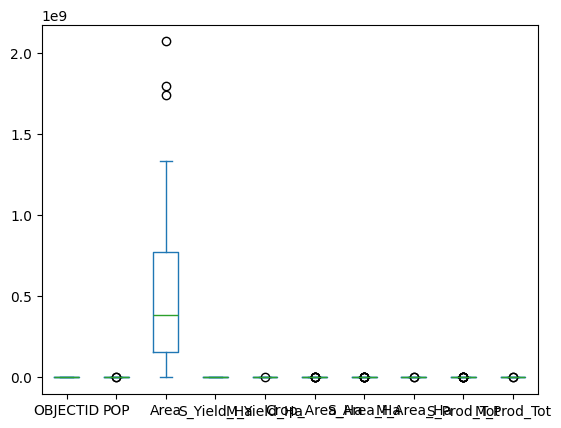

In [17]:
# Checking for outliers
df.plot(kind= 'box')

From the above boxplot, we can see that the field area contains outliers, but given the type of dataset,we shall keep the ouliers as a representative of the real data.

# Exploratory Data Analysis
## Univariate Analysis
This is the analysis of data that involves one single variable.

It also uses typical plots such as histograms, box plots and also pie charts.




In [18]:
# Let's check the statistical analysis of the data again
df.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824456,326.479336,2.543687e+05,2.896239e+05
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06


We can see the minimum population is 1418 while the maximum population is 100919.

The total hectare of the crops is 52 hectares

The above summarises the mean, standard deviation and a lot os statistical summary for the dataset.

In [19]:
# Let's calculate the measures of central tendancy
# We will just use their functions
df.mean(numeric_only= True)

,0
OBJECTID,7.878654e+02
POP,2.893469e+04
Area,5.331913e+08
S_Yield_Ha,2.741654e+02
M_Yield_Ha,9.402596e+02
Crop_Area_Ha,2.839647e+03
S_Area_Ha,2.253143e+03
M_Area_Ha,5.363006e+02
S_Prod_Tot,6.557443e+05
M_Prod_Tot,5.500730e+05


In [20]:
df.median(numeric_only= True)

,0
OBJECTID,8.105000e+02
POP,2.305350e+04
Area,3.848356e+08
S_Yield_Ha,2.772552e+02
M_Yield_Ha,1.016684e+03
Crop_Area_Ha,1.654265e+03
S_Area_Ha,1.231824e+03
M_Area_Ha,3.264793e+02
S_Prod_Tot,2.543687e+05
M_Prod_Tot,2.896239e+05


In [21]:
df.mode(numeric_only= True)

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,1418,2121209,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
1,264,2503,2738777,114.270921,211.965635,0.322316,0.171390,0.191375,1.967487e+01,4.622440e+01
2,265,3272,4673094,114.795569,241.538427,29.145760,1.339919,2.416786,6.464290e+02,2.081356e+03
3,266,4053,13071455,120.862232,497.353282,60.772086,30.157048,8.561644,8.522334e+03,9.991488e+03
4,267,7161,17207110,128.555598,507.907068,145.243518,58.325090,15.660409,9.379029e+03,1.018120e+04
5,268,8010,23972401,130.007687,528.699822,175.080527,156.503888,18.526186,3.321180e+04,2.277264e+04
6,591,9929,60801942,131.977698,546.140294,401.797821,185.283445,27.795767,4.925166e+04,3.496159e+04
7,592,11489,67612362,133.667936,591.270355,698.171218,267.559128,45.721712,5.338064e+04,3.601715e+04
8,593,11772,115941152,134.084089,633.423182,788.462800,315.979223,56.275355,6.789742e+04,3.897166e+04
9,594,12573,118997955,146.117797,650.123565,792.249273,324.202666,68.124005,7.912642e+04,3.963498e+04


In [22]:
df.var(numeric_only= True)

,0
OBJECTID,7.845675e+04
POP,4.353534e+08
Area,2.414060e+17
S_Yield_Ha,1.405882e+04
M_Yield_Ha,1.034535e+05
Crop_Area_Ha,9.675247e+06
S_Area_Ha,8.728219e+06
M_Area_Ha,5.243096e+05
S_Prod_Tot,9.832387e+11
M_Prod_Tot,6.303894e+11


In [23]:
df.std(numeric_only= True)

,0
OBJECTID,2.801013e+02
POP,2.086512e+04
Area,4.913308e+08
S_Yield_Ha,1.185699e+02
M_Yield_Ha,3.216419e+02
Crop_Area_Ha,3.110506e+03
S_Area_Ha,2.954356e+03
M_Area_Ha,7.240923e+02
S_Prod_Tot,9.915839e+05
M_Prod_Tot,7.939707e+05


## Skewness
Skewness measures the asymmetry of a distribution around its mean. It tells you how symmetrical your data is or not. **In a normal curve, skewness is 0**

In [25]:
df.skew(numeric_only= True)

,0
OBJECTID,-0.202813
POP,1.628375
Area,1.286987
S_Yield_Ha,0.465789
M_Yield_Ha,-0.815949
Crop_Area_Ha,1.967090
S_Area_Ha,2.292435
M_Area_Ha,3.061493
S_Prod_Tot,2.512412
M_Prod_Tot,3.154047


<Figure size 800x600 with 0 Axes>

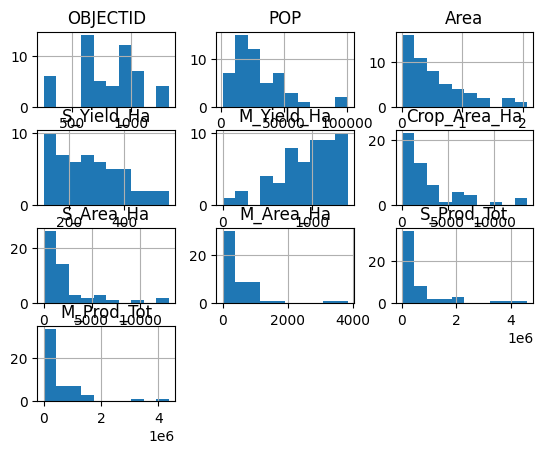

<Figure size 800x600 with 0 Axes>

In [26]:
# Let's try a plot using a histogram
df.hist()
plt.figure(figsize=(8,6))

## Kurtosis
Kurtosis measures the tailedness of a distribution. It tells you how peaked or flat your distribution is compared to a normal curve.

***A standard distribution has a kurtosis of 3***

In [27]:
df.kurt(numeric_only= True)

,0
OBJECTID,-0.315752
POP,3.585548
Area,1.418167
S_Yield_Ha,-0.574233
M_Yield_Ha,0.343378
Crop_Area_Ha,3.972653
S_Area_Ha,5.286508
M_Area_Ha,11.258128
S_Prod_Tot,6.312159
M_Prod_Tot,12.184914


In [34]:
# Checking the most popular OBJECTID
df['OBJECTID'].value_counts().head(10)

,count
OBJECTID,
263,1
264,1
265,1
266,1
267,1
268,1
591,1
592,1
593,1


From the above output, there is none that is more popular as they are the same

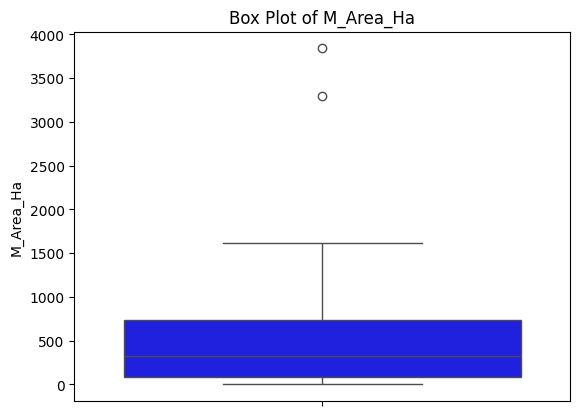

In [38]:
# Box plot
sns.boxplot(data = df['M_Area_Ha'], color='blue')
plt.title('Box Plot of M_Area_Ha')
plt.show()

M_Area_Ha has few outliers as shown

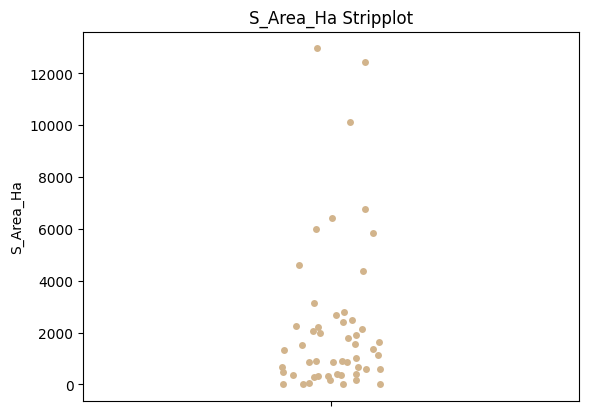

In [40]:
# Stripplot
sns.stripplot(data = df['S_Area_Ha'], color='tan')
plt.title('S_Area_Ha Stripplot')
plt.show()

A strip plot shows a dot-like view of individual observations and is used to visualize concentration of outliers.

## Bivariate Analysis
This is analysis that studies the relationship between two variables in order to see how one variable influences or relates to another

Typical plots used are *scatterplots, line charts* and analysis include *correlation* and also *covariance*

Correlation is the statistical summary of the relationship between variables.


*   **Positive Correlation**: both variables change in the same direction

*   **Neutral Correlation**: No relationship in the change of the variables

*   **Negative Correlation**: variables change in opposite directions








In [41]:
df.corr(numeric_only=True)

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,1.000000,-0.413025,0.153613,-0.224381,-0.284216,-0.407773,-0.455794,0.135549,-0.528434,0.117310
POP,-0.413025,1.000000,0.257082,-0.081385,0.135996,0.392587,0.371068,0.157311,0.342992,0.144350
Area,0.153613,0.257082,1.000000,0.005760,0.131586,0.328405,0.265610,0.307355,0.196369,0.262690
S_Yield_Ha,-0.224381,-0.081385,0.005760,1.000000,0.624494,0.171402,0.110636,0.238892,0.288920,0.335797
M_Yield_Ha,-0.284216,0.135996,0.131586,0.624494,1.000000,0.263790,0.221676,0.200557,0.316694,0.334450
Crop_Area_Ha,-0.407773,0.392587,0.328405,0.171402,0.263790,1.000000,0.970304,0.261783,0.945518,0.282030
S_Area_Ha,-0.455794,0.371068,0.265610,0.110636,0.221676,0.970304,1.000000,0.021327,0.958651,0.049947
M_Area_Ha,0.135549,0.157311,0.307355,0.238892,0.200557,0.261783,0.021327,1.000000,0.076654,0.962444
S_Prod_Tot,-0.528434,0.342992,0.196369,0.288920,0.316694,0.945518,0.958651,0.076654,1.000000,0.127794
M_Prod_Tot,0.117310,0.144350,0.262690,0.335797,0.334450,0.282030,0.049947,0.962444,0.127794,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

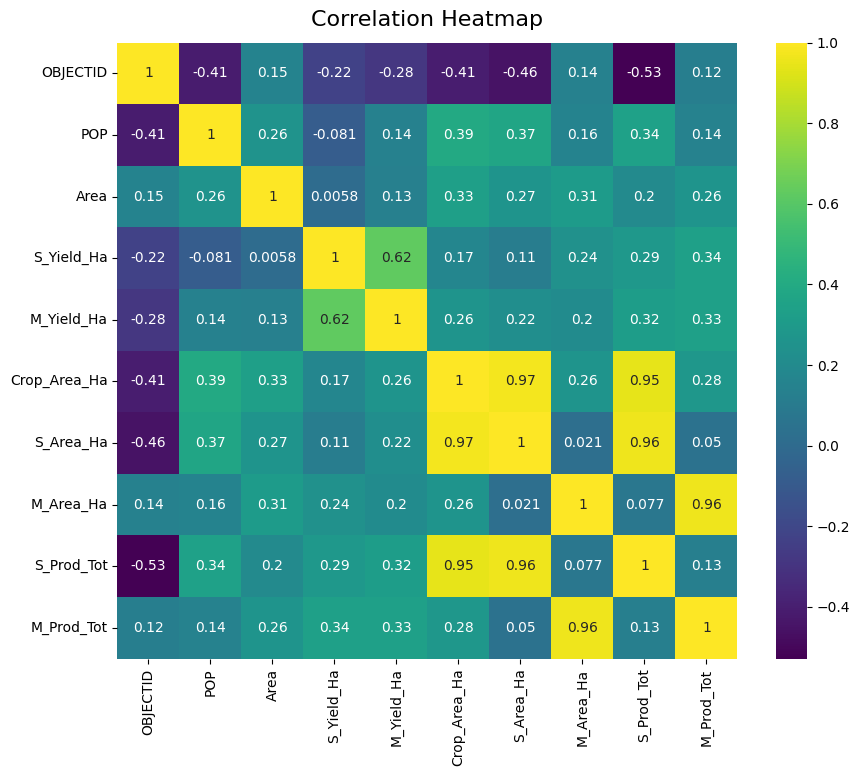

In [44]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
heatmap= sns.heatmap(df.corr(numeric_only=True), annot=True, cmap= 'viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 16}, pad=12)

Correlation heatmaps contain the same information in a visually appealing way.

They show in a glance which variables are correlated, to what degree, in which direction, and alerts us to potential multicollinearity.

From the heatmap;


*   +1.....shows perfect positive correlation(as one increases, so does the other)

* 0 shows no linear correlation


*  -1.....shows perfect negative correlation(as one increases, the other one decreases)





Text(0.5, 1.0, 'Correlation Heatmap')

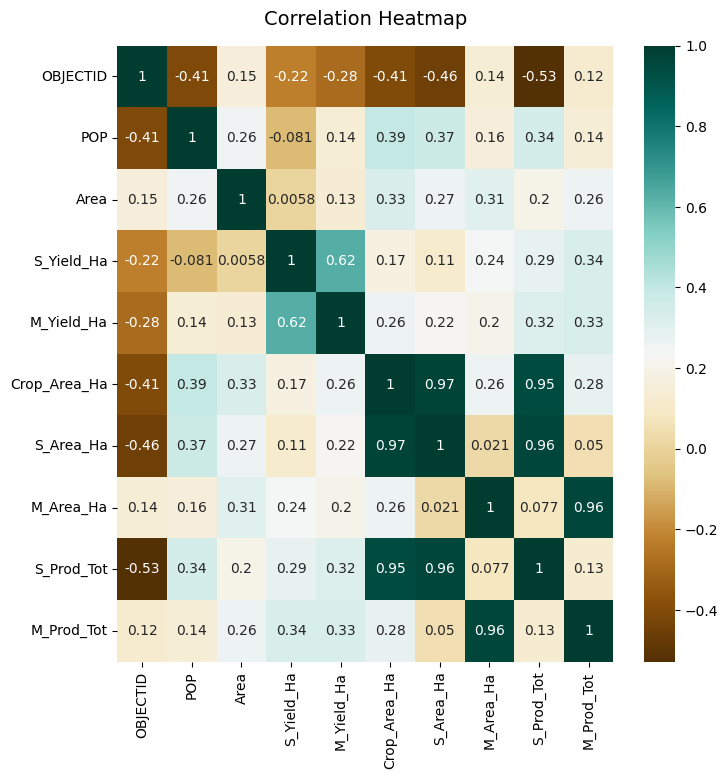

In [45]:
plt.figure(figsize=(8,8))
heatmap= sns.heatmap(df.corr(numeric_only=True), annot=True, cmap= 'BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=15)

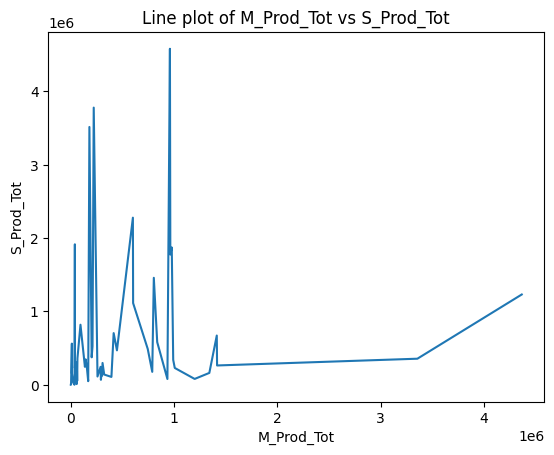

In [46]:
# Line plot
sns.lineplot(data= df,x=df['M_Prod_Tot'],y=df['S_Prod_Tot'])
plt.title('Line plot of M_Prod_Tot vs S_Prod_Tot')
plt.show()

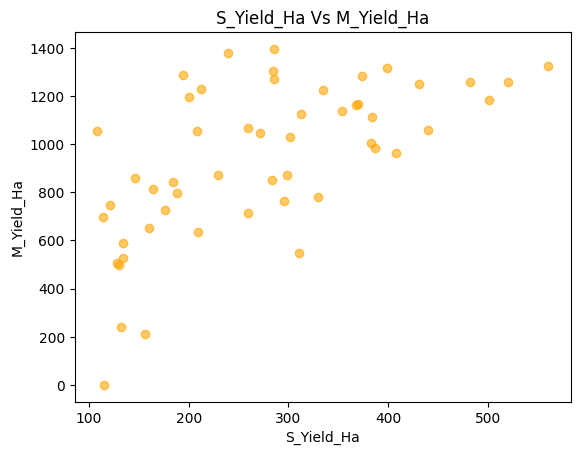

In [49]:
# Scatter plot
plt.scatter(df['S_Yield_Ha'], df['M_Yield_Ha'], alpha=0.6, color='orange')
plt.title('S_Yield_Ha Vs M_Yield_Ha')
plt.xlabel('S_Yield_Ha')
plt.ylabel('M_Yield_Ha')
plt.grid=True
plt.show()

# Crosstab
 This methodis used to compute a simple cross-tabulation of two(or more) factors. By default,it computes a frequency table of the factors unless an array of values and aggregation function are passed.

In [50]:
df.nunique()

,0
OBJECTID,52
SUBCOUNTY_NAME,52
DISTRICT_NAME,7
POP,52
Area,52
Karamoja,1
S_Yield_Ha,52
M_Yield_Ha,52
Crop_Area_Ha,52
S_Area_Ha,52


In [53]:
pd.crosstab(df['SUBCOUNTY_NAME'],df['Crop_Area_Ha'])

Crop_Area_Ha,0.171390,0.322316,29.145760,60.772086,145.243518,175.080527,401.797821,698.171218,788.462800,792.249273,...,5473.443674,5759.618906,5793.507623,6471.047334,6890.699234,7023.533691,7087.823334,10398.249390,13278.520430,13587.990760
SUBCOUNTY_NAME,,,,,,,,,,,,,,,,,,,,,
ABIM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABIM TOWN COUNCIL,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
ALEREK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMUDAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMUDAT TOWN COUNCIL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IRIIRI,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
KAABONG EAST,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KAABONG TOWN COUNCIL,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KAABONG WEST,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Pivot Tables
This is a tool used to quickly summarize , analyze and reorganize large datasets- especially in spreadsheets like Excel. It  lets you group data and calculate totals without altreing the data

In [59]:
x = pd.pivot_table(df.round(1), index=['M_Area_Ha'], columns=['Area'], values='S_Area_Ha')
x

Area,2121209,2738777,4673094,13071455,17207110,23972401,60801942,67612362,115941152,118997955,...,928683431,1030623258,1067176155,1069331387,1199409465,1255760525,1330019236,1742041261,1794470536,2069554899
M_Area_Ha,,,,,,,,,,,,,,,,,,,,,
0.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.4,NaN,NaN,NaN,NaN,58.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.6,NaN,NaN,NaN,NaN,NaN,1520.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15.7,NaN,NaN,NaN,NaN,NaN,NaN,1004.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18.5,NaN,NaN,NaN,156.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27.8,NaN,NaN,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,910.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Conclusions


*  **NGO clustering**: NGOs tend to concentrate in urban and central districts ,especially around Kampala, regardless of local eduacation indicators

*   **Mismatch with need**: Several rural sub-counties with low education attainment and poor infrastructure show minimal NGO presence


*  **Data gaps**: Some regions lack sufficient census or boundary data, limiting full visibility into NGO coverage

# Recommendations


1.   Encourage targeted expansion by the NGOs to districts with low education
2.   Support data transparency in order to improve accessibility of NGO and census records

1.   Develop shared platforms for NGOs ang government to prevent blindspots
2.   Use findings to advocate  for equitable NGO registration that reflect actual community needs



